<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Exploratory_Data_Analysis_Job_Salary_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pyLDAvis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('darkgrid')
df = pd.read_csv('/content/final_master.csv')
df

,Unnamed: 0,company,job_title,job_descr,time_of_scrape,job_search_term,salary_from_page_source_as_stated,salary_from_page_source_conv_hourly,salary_from_page_source_time_period,Num_reviews,Loc_from_title,date
0,0,LTK Consultants,Data Analyst,LTK Consultants have an exciting opportunity f...,Wed Nov 25 12:59:26 2020,"title:(data,analyst)",25000.0,13.17,Y,37.0,Birmingham,2020-11-25
1,1,Intouch Games,Data Analyst – Business Analyst,Job title Data Analyst Business Analyst Locati...,Wed Nov 25 12:59:32 2020,"title:(data,analyst)",NaN,NaN,NaN,12.0,Halesowen,2020-11-25
2,2,Page Personnel,Customer Data Analyst,Our Client based in Salford Are the leader of ...,Wed Nov 25 12:59:37 2020,"title:(data,analyst)",10.0,10.00,H,255.0,Salford,2020-11-25
3,3,Propel Finance,Business Intelligence Data Analyst,Our business is underpinned by our three value...,Wed Nov 25 12:59:43 2020,"title:(data,analyst)",NaN,NaN,NaN,NaN,Newport,2020-11-25
4,4,Echo,Senior Data Analyst,Our Company Our mission is to simplify pharmac...,Wed Nov 25 12:59:48 2020,"title:(data,analyst)",65000.0,34.25,Y,NaN,London,2020-11-25
...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1077,Ocado Group,Machine Learning Engineer,We are on a mission to transform the future of...,Tue Nov 24 14:16:42 2020,"title:(machine, learning)",NaN,NaN,NaN,1022.0,Hatfield,2020-11-24
1078,1078,Greensill,Machine Learning Technical Specialist,Role Purpose Implement financial project in a ...,Tue Nov 24 14:16:48 2020,"title:(machine, learning)",NaN,NaN,NaN,NaN,Warrington,2020-11-24
1079,1079,TikTok,Graduate Machine Learning Engineer (Trust and ...,Responsibilities TikTok is the leading destina...,Tue Nov 24 14:16:53 2020,"title:(machine, learning)",NaN,NaN,NaN,11.0,London,2020-11-24
1080,1080,Understanding Recruitment,"Machine Learning Engineer (Data Scientist, NLP...",As a Machine Learning Engineer Data Scientist ...,Tue Nov 24 14:16:59 2020,"title:(machine, learning)",65000.0,34.25,Y,NaN,London,2020-11-24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1082 non-null   int64  
 1   company                              1082 non-null   object 
 2   job_title                            1082 non-null   object 
 3   job_descr                            1082 non-null   object 
 4   time_of_scrape                       1082 non-null   object 
 5   job_search_term                      1082 non-null   object 
 6   salary_from_page_source_as_stated    449 non-null    float64
 7   salary_from_page_source_conv_hourly  448 non-null    float64
 8   salary_from_page_source_time_period  448 non-null    object 
 9   Num_reviews                          573 non-null    float64
 10  Loc_from_title                       1082 non-null   object 
 11  date                          

In [ ]:
df.job_search_term = df.job_search_term.apply(lambda x : x.replace('title:(data, scientist)', 'Data Scientist'))
df.job_search_term = df.job_search_term.apply(lambda x : x.replace('title:(data,analyst)', 'Data Analyst'))
df.job_search_term = df.job_search_term.apply(lambda x : x.replace('title:(machine, learning)', 'Machine Learning'))

Identifikasi job a **Data Scientist**

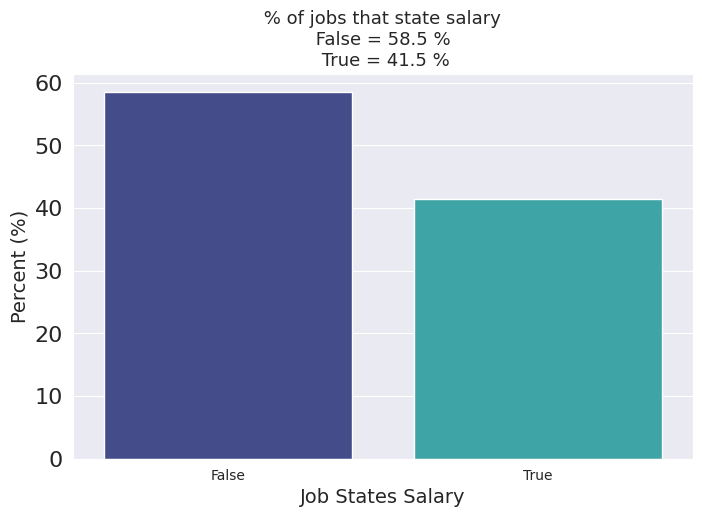

In [ ]:
plt.figure(figsize=(8,5))
df['states_salary'] = ~df.salary_from_page_source_as_stated.isna()
aa = df.groupby('states_salary').size().reset_index()
aa.iloc[:,1] = round(aa.iloc[:, 1]/len(df) * 100, 2)
plt.title(f' % of jobs that state salary \n False = {aa.iloc[0,1]} % \n True = {aa.iloc[1,1]} %', fontdict={'size':13})
sns.barplot(data=aa,
            x='states_salary',
            y=aa.iloc[:,1],
            palette='mako',
            saturation=0.9)
plt.xlabel('Job States Salary', fontdict={'size':14})
plt.ylabel('Percent (%)', fontdict={'size':14,},)
plt.show()

**Melihat Perbandingan gaji yang diharapkan dari Posisi Pekerjaan**

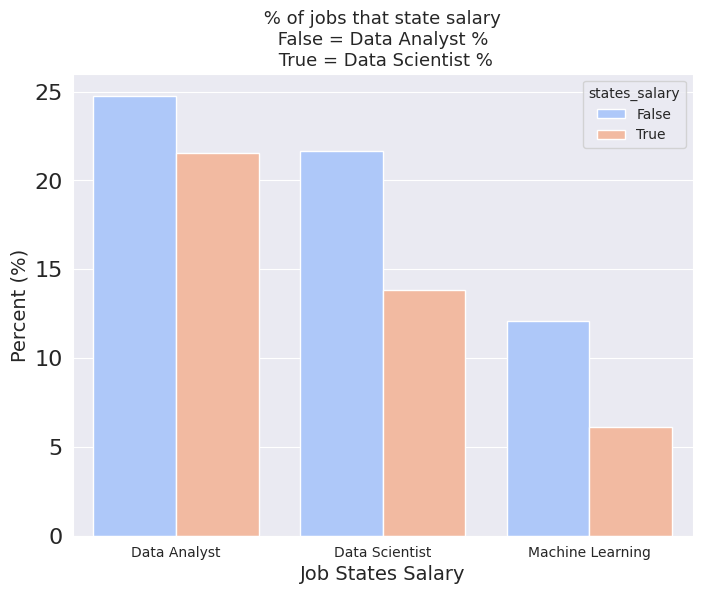

In [ ]:
plt.figure(figsize=(8,6))
aa = df.groupby(['states_salary', 'job_search_term']).size().reset_index()
aa.iloc[:,2] = round(aa.iloc[:, 2]/len(df) * 100, 2)
plt.title(f' % of jobs that state salary \n False = {aa.iloc[0,1]} % \n True = {aa.iloc[1,1]} %', fontdict={'size':13})
sns.barplot(data=aa,
            hue='states_salary',
            y=aa.iloc[:,2],
            x='job_search_term',
            palette='coolwarm',
            saturation=0.9)
plt.xlabel('Job States Salary', fontdict={'size':14})
plt.ylabel('Percent (%)', fontdict={'size':14,},)
plt.show()

In [ ]:
salaries_df = df.loc[~df.salary_from_page_source_as_stated.isna()]
salaries_df.salary_from_page_source_time_period.value_counts()

salary_from_page_source_time_period
Y    382
D     45
H     12
W      7
M      2
Name: count, dtype: int64

**Identify Salaries in the Period**

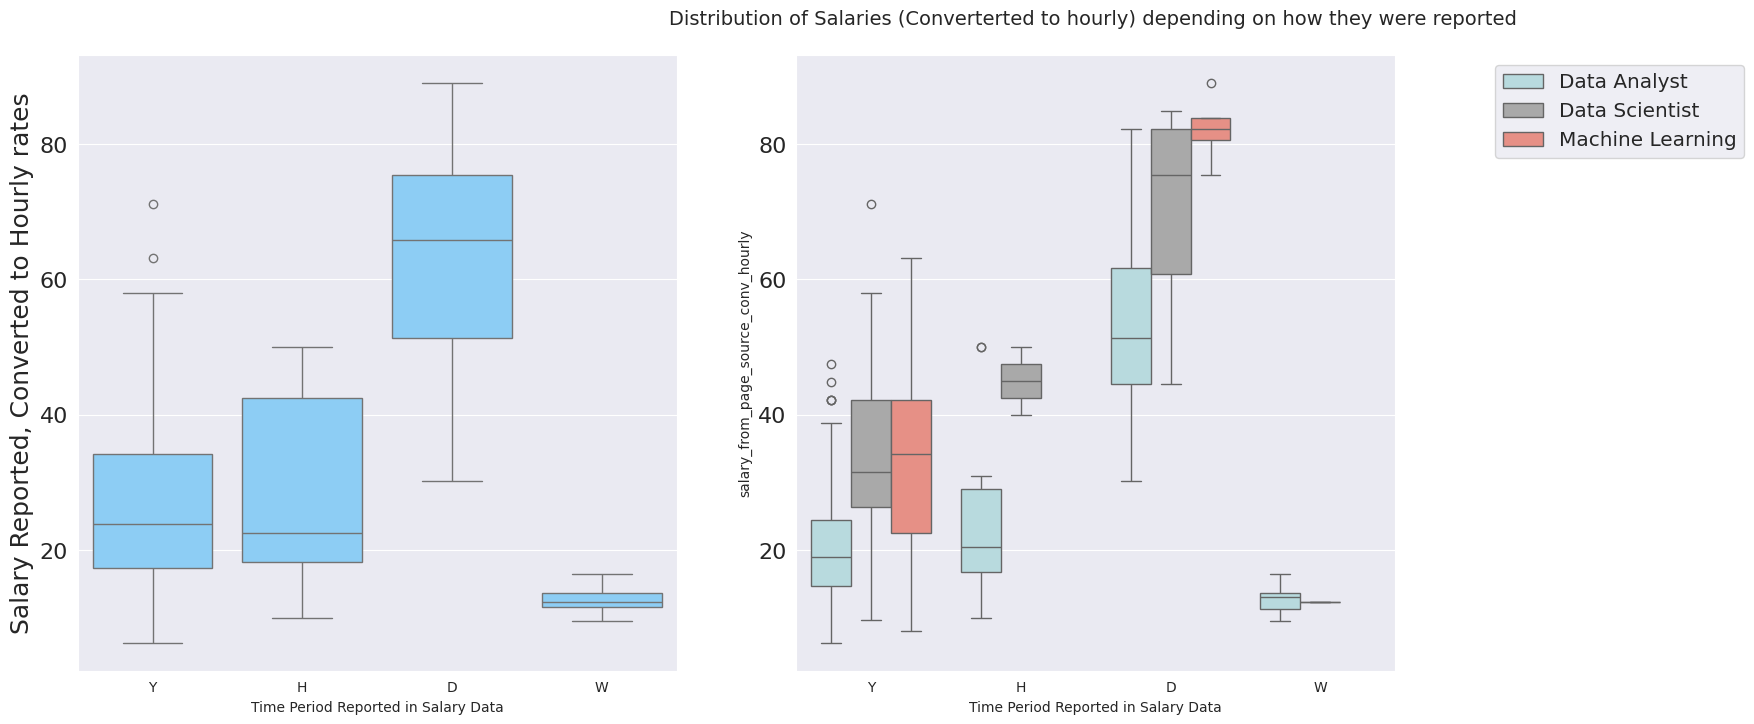

In [ ]:
salaries_by_period = salaries_df.loc[~((salaries_df.salary_from_page_source_time_period == 'M'))]
fig, ax = plt.subplots(1,2, figsize=(17,8))
plt.title('Distribution of Salaries (Converterted to hourly) depending on how they were reported \n', fontdict={'size':14})
job_hue_dict = {'Data Scientist' : '#A9A9A9', 'Data Analyst' : '#B0E0E6', 'Machine Learning' : '#FA8072'}
job_hue_order = ['Data Analyst', 'Data Scientist', 'Machine Learning']
sns.boxplot(data = salaries_by_period,
            y='salary_from_page_source_conv_hourly',
            x='salary_from_page_source_time_period',
            ax=ax[0],
            color='#87CEFA',
            saturation=0.9)
sns.boxplot(data=salaries_by_period,
            y='salary_from_page_source_conv_hourly',
            x='salary_from_page_source_time_period',
            hue='job_search_term',
            ax=ax[1],
            hue_order=job_hue_order,
            palette=job_hue_dict,
            saturation=0.7)
ax[0].set_ylabel('Salary Reported, Converted to Hourly rates', fontdict={'size':18})
ax[0].set_xlabel('Time Period Reported in Salary Data')
ax[1].set_xlabel('Time Period Reported in Salary Data')
plt.legend(fontsize='x-large', loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

**Identify the Result Annual Salary**

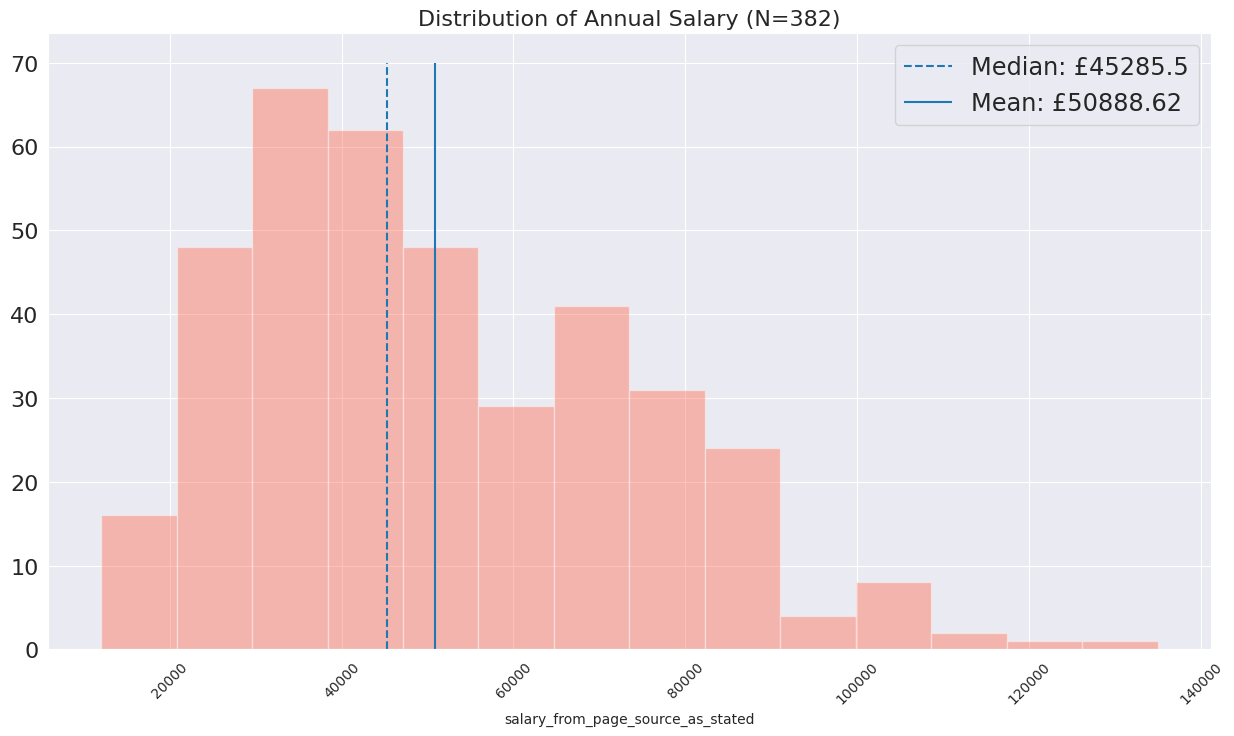

In [ ]:
annual_pay = salaries_df.loc[salaries_df.salary_from_page_source_time_period == 'Y']
plt.figure(figsize=(15,8))
ax = sns.distplot(annual_pay.salary_from_page_source_as_stated,
                 kde=False,
                 norm_hist=False,
                 color='#FF6347')
plt.title(f'Distribution of Annual Salary (N={len(annual_pay)})', fontdict={'size':16})
plt.xticks(rotation=45)
median = annual_pay.salary_from_page_source_as_stated.median().round(2)
mean = annual_pay.salary_from_page_source_as_stated.mean().round(2)
plt.vlines(x=median, ymin=0, ymax=70, linestyles='dashed', label=f'Median: £{median}')
plt.vlines(x=mean, ymin=0, ymax=70, linestyles='solid', label=f'Mean: £{mean}')
plt.legend(fontsize='xx-large')
plt.show()

In [ ]:
num_cat = annual_pay.job_search_term.value_counts()
num_cat

job_search_term
Data Analyst        196
Data Scientist      124
Machine Learning     62
Name: count, dtype: int64

In [ ]:
n_DA = num_cat[0]
n_DS = num_cat[1]
n_ML = num_cat[2]

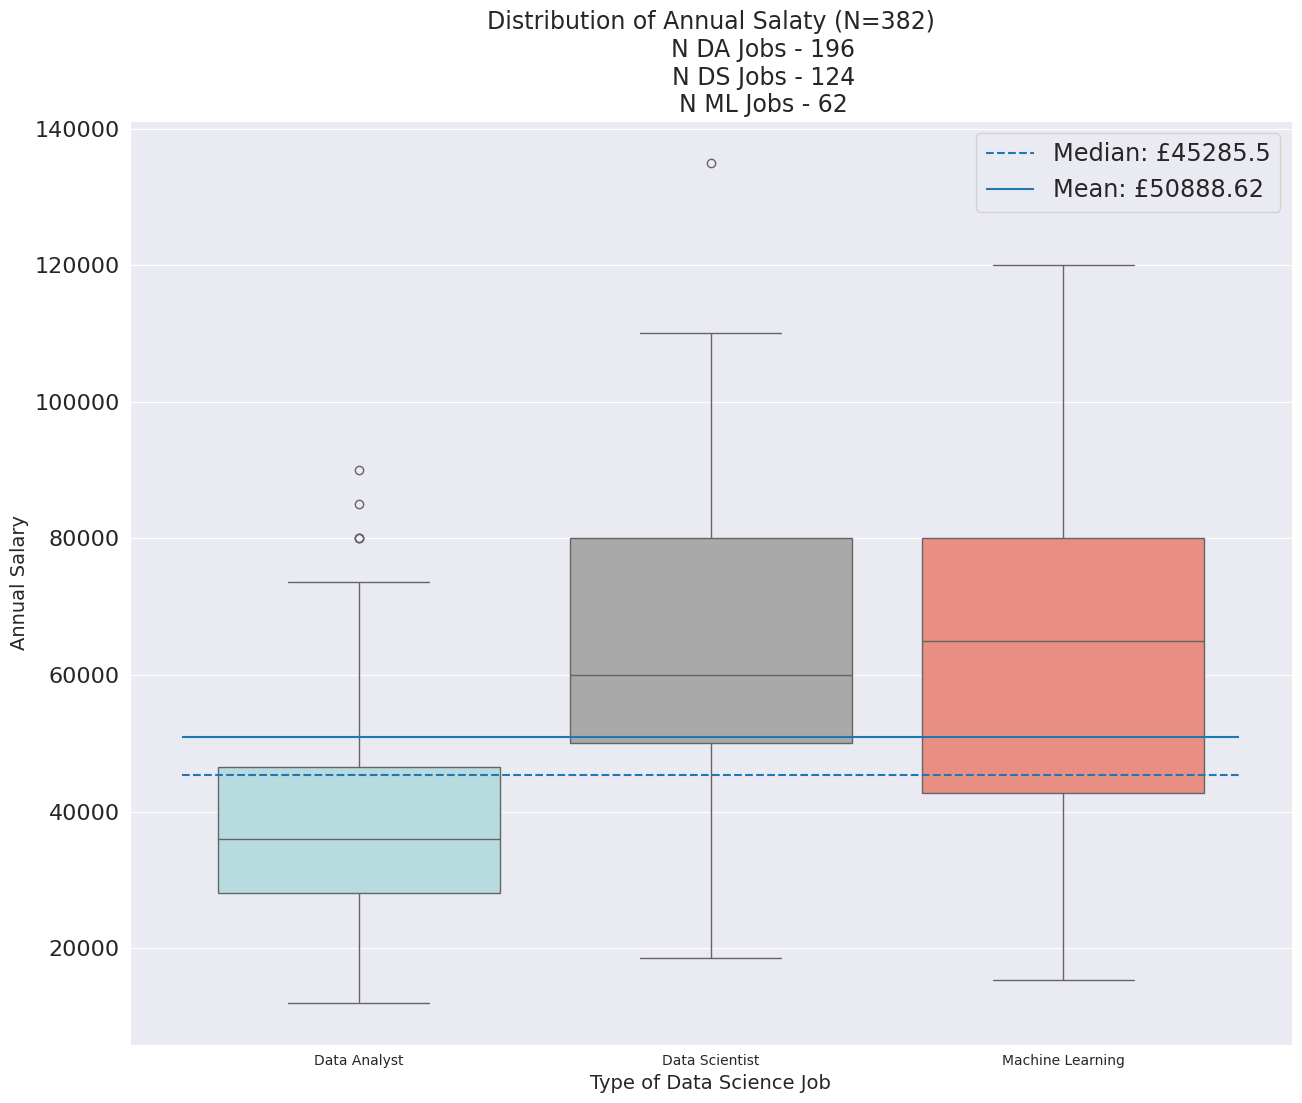

In [ ]:
annual_pay = salaries_df.loc[salaries_df.salary_from_page_source_time_period == 'Y']
plt.figure(figsize=(15,12))
ax = sns.boxplot(data=annual_pay,
                 y='salary_from_page_source_as_stated',
                 x='job_search_term',
                 palette=job_hue_dict,
                 hue_order=job_hue_order)
plt.title(f'''Distribution of Annual Salaty (N={len(annual_pay)})
              N DA Jobs - {n_DA}
              N DS Jobs - {n_DS}
              N ML Jobs - {n_ML}''', fontdict={'size':17})
plt.xlabel('Type of Data Science Job', fontdict={'size':14})
plt.ylabel('Annual Salary', fontdict={'size':14})
plt.xticks(rotation=0)
mean = annual_pay.salary_from_page_source_as_stated.mean().round(2)
median = annual_pay.salary_from_page_source_as_stated.median().round(2)
plt.hlines(y=median, xmin=-.5, xmax=2.5, linestyles='dashed', label=f'Median: £{median}')
plt.hlines(y=mean, xmin=-.5, xmax=2.5, linestyles='solid', label=f'Mean: £{mean}')
plt.legend(fontsize='xx-large')
plt.show()

Identify Locations That Take on the Role of a **Data Scientist**

In [ ]:
print(f'Number of Unique Location Reported: {df.Loc_from_title.nunique()}')
loc_df = df[['salary_from_page_source_as_stated', 'salary_from_page_source_time_period', 'job_title', 'Loc_from_title']]
loc_df = loc_df.groupby(['Loc_from_title']).size().sort_values(ascending=False)
loc_df[:20]

Number of Unique Location Reported: 195


Loc_from_title
London            532
Cambridge          55
Bristol            29
Home Based         24
Manchester         20
Leeds              17
Oxford             15
Reading            13
Belfast            13
Glasgow            13
Birmingham         12
Edinburgh          12
Nottingham         11
Hatfield            6
Slough              6
Richmond            5
East London         5
Cardiff             5
Southampton         5
Leamington Spa      5
dtype: int64

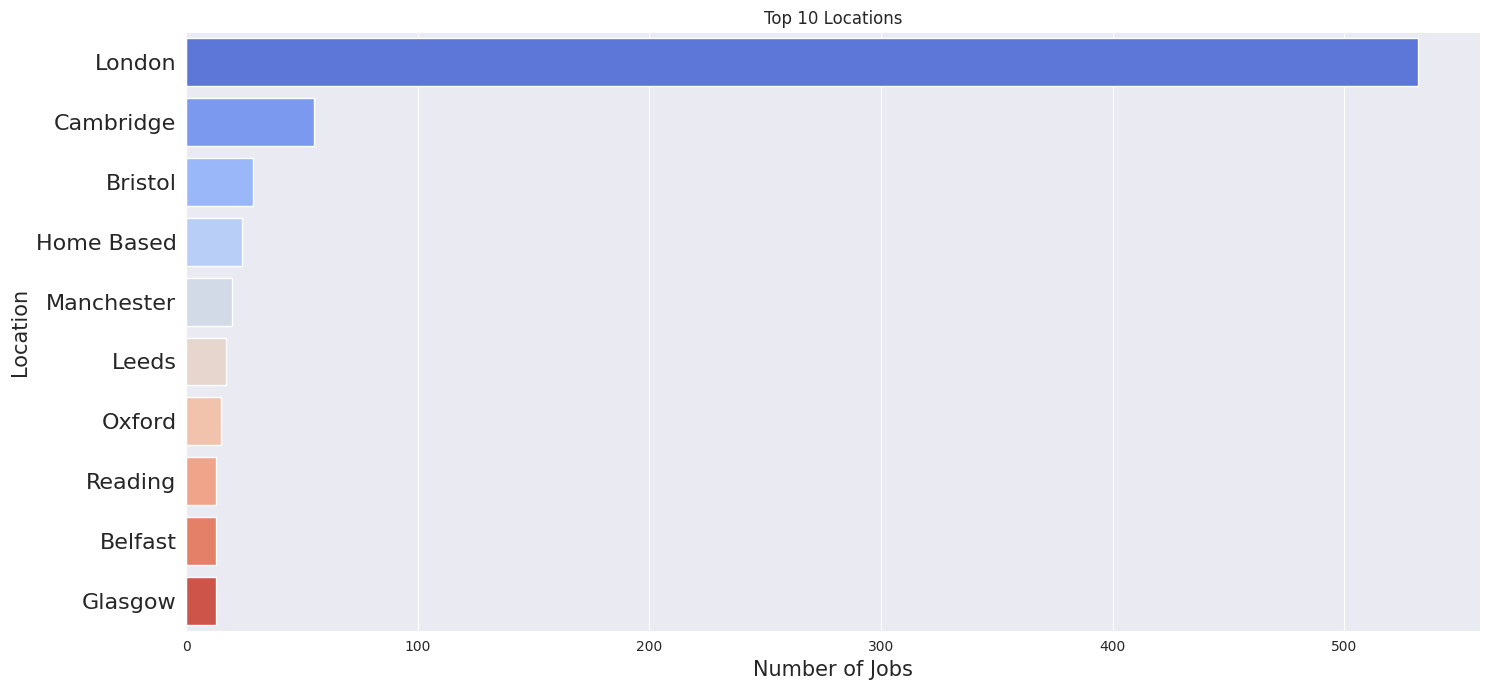

In [ ]:
loc_df = df[['salary_from_page_source_as_stated', 'salary_from_page_source_time_period', 'job_title', 'Loc_from_title']]
loc_df_gr = loc_df.groupby(['Loc_from_title']).size().sort_values(ascending=False)
top_10 = loc_df_gr[:10]
top_5 = loc_df_gr[:5]
plt.figure(figsize=(15,7))
sns.barplot(y=top_10.index,
            x=top_10,
            palette='coolwarm',
            saturation=0.9)
plt.title('Top 10 Locations')
plt.ylabel('Location', fontdict={'size':15})
plt.xlabel('Number of Jobs', fontdict={'size':15})
plt.tight_layout()
plt.show()

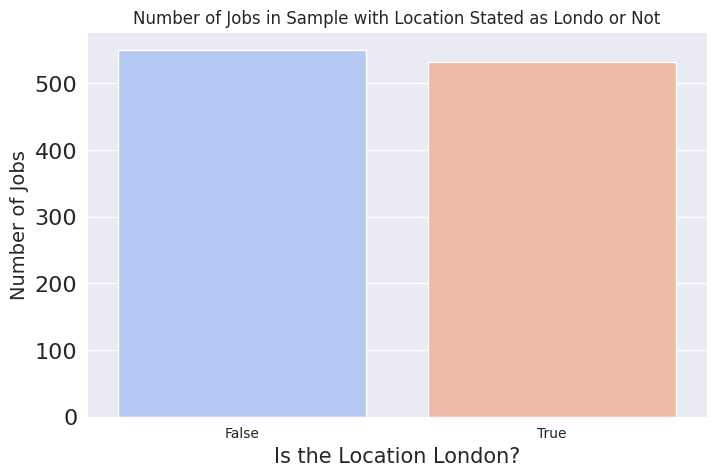

In [ ]:
loc_df['is_london'] = False
loc_df.loc[loc_df.Loc_from_title == 'London', 'is_london'] = True
is_london_val = loc_df.is_london.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=is_london_val.index,
            y=is_london_val.values,
            palette='coolwarm')
plt.title('Number of Jobs in Sample with Location Stated as Londo or Not')
plt.ylabel('Number of Jobs', fontdict={'size':14})
plt.xlabel('Is the Location London?', fontdict={'size':15})
plt.show()

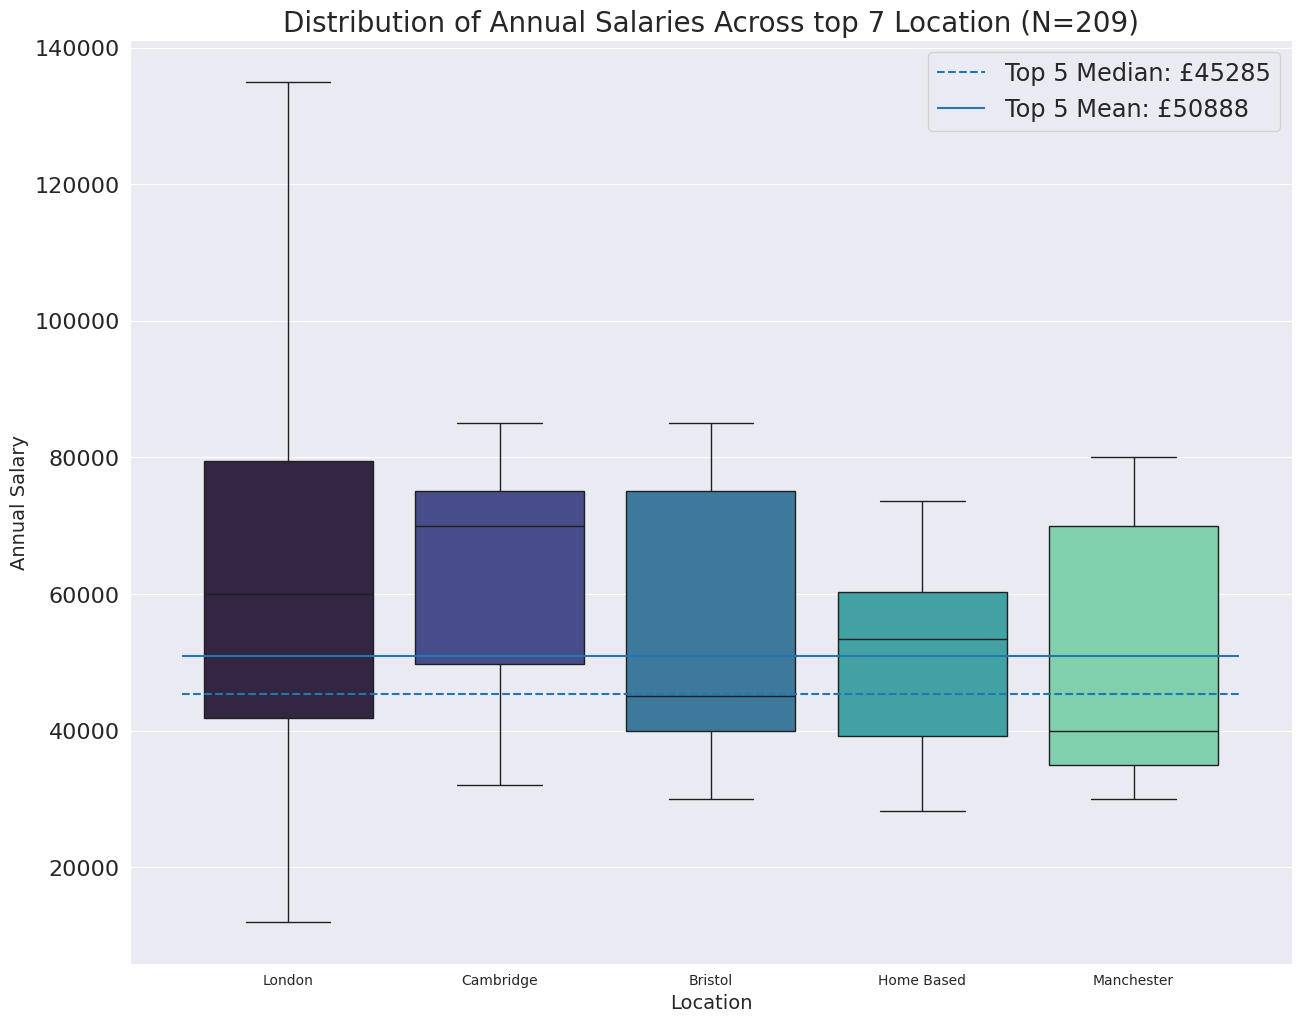

Loc_from_title
London        532
Cambridge      55
Bristol        29
Home Based     24
Manchester     20
dtype: int64


In [ ]:
plt.figure(figsize=(15,12))
top_5_val = annual_pay.loc[annual_pay.Loc_from_title.isin(top_5.index)]
ax = sns.boxplot(data=top_5_val,
                 y='salary_from_page_source_as_stated',
                 x='Loc_from_title',
                 order=top_5.index.to_list(),
                 palette='mako',
                 saturation=0.85)
plt.title(f'Distribution of Annual Salaries Across top 7 Location (N={len(top_5_val)})', fontdict={'size':20})
plt.ylabel('Annual Salary', fontdict={'size':14})
plt.xlabel('Location', fontdict={'size':14})
sample_mean = int(annual_pay.salary_from_page_source_as_stated.mean())
sample_median = int(annual_pay.salary_from_page_source_as_stated.median())
plt.hlines(y=sample_median, xmin=-0.5, xmax=4.5, linestyle='dashed', label=f'Top 5 Median: £{sample_median}')
plt.hlines(y=sample_mean, xmin=-0.5, xmax=4.5, linestyle='solid', label=f'Top 5 Mean: £{sample_mean}')
plt.legend(fontsize='xx-large')
plt.show()
print(top_5)

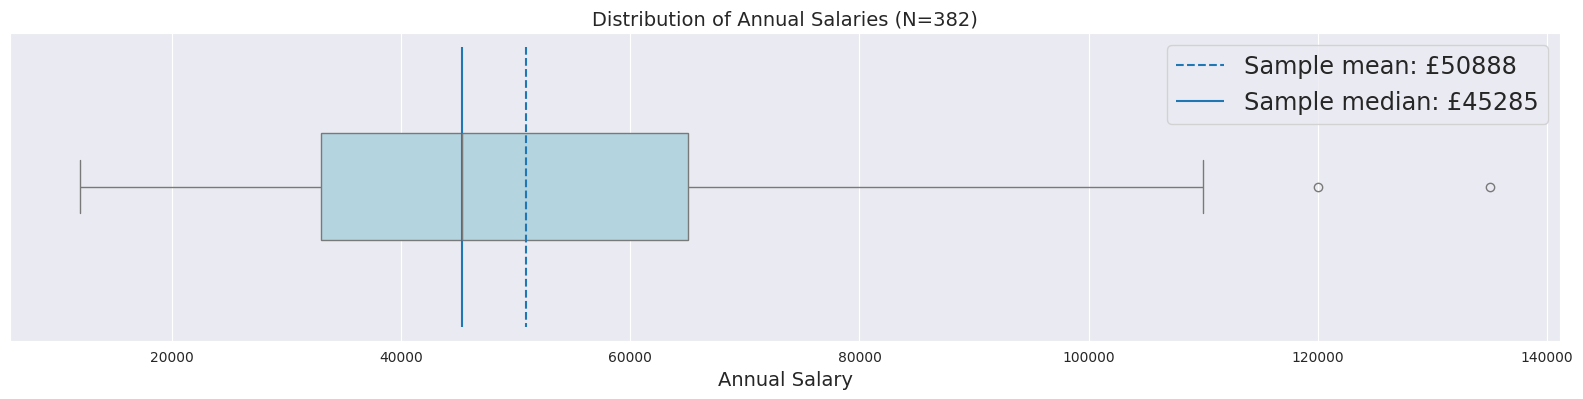

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(data=annual_pay,
                 x='salary_from_page_source_as_stated', color='#ADD8E6')
plt.title(f'Distribution of Annual Salaries (N={len(annual_pay)})', fontdict={'size':14})
plt.xlabel('Annual Salary', fontdict={'size':14})
sample_median = int(annual_pay.salary_from_page_source_as_stated.median())
sample_mean = int(annual_pay.salary_from_page_source_as_stated.mean())
plt.vlines(x=sample_mean, ymin=-1.05, ymax=1.05, linestyles='dashed', label=f'Sample mean: £{sample_mean}')
plt.vlines(x=sample_median, ymin=-1.05, ymax=1.05, linestyles='solid', label=f'Sample median: £{sample_median}')
plt.legend(fontsize='xx-large', loc='upper right')
plt.show()

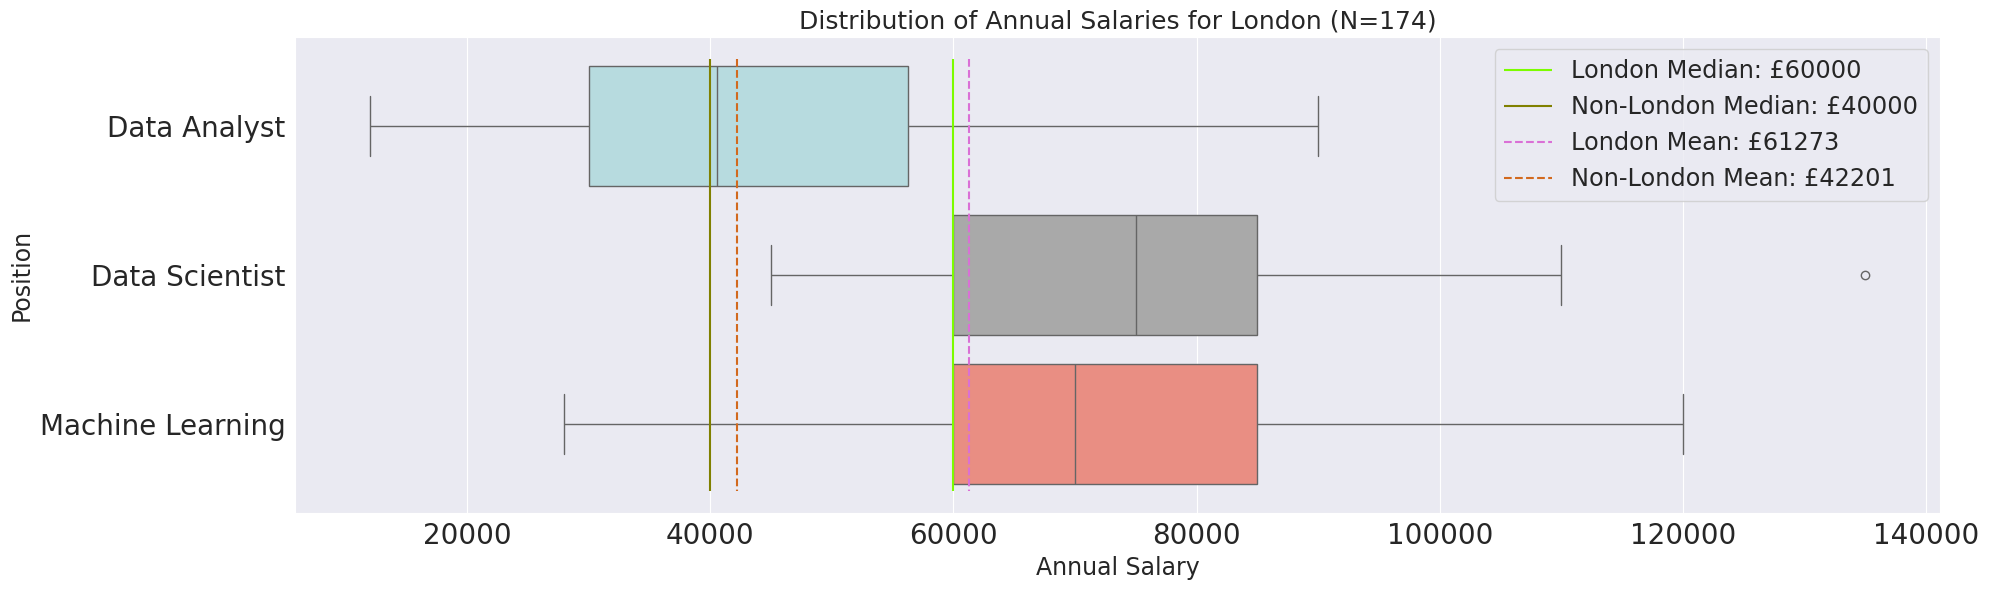

job_search_term
Data Analyst        76
Data Scientist      65
Machine Learning    33
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(20,6))
ldn_annual = annual_pay.loc[annual_pay.Loc_from_title == 'London']
non_ldn_annual = annual_pay.loc[~(annual_pay.Loc_from_title == 'London')]
ax = sns.boxplot(data=ldn_annual,
                 x='salary_from_page_source_as_stated',
                 y='job_search_term',
                 palette=job_hue_dict)
plt.title(f'Distribution of Annual Salaries for London (N={len(ldn_annual)})', fontdict={'size':18})
plt.xlabel('Annual Salary', fontdict={'size':17})
plt.ylabel('Position', fontdict={'size':17})
ldn_median = int(ldn_annual.salary_from_page_source_as_stated.median())
non_ldn_median = int(non_ldn_annual.salary_from_page_source_as_stated.median())
ldn_mean = int(ldn_annual.salary_from_page_source_as_stated.mean())
non_ldn_mean = int(non_ldn_annual.salary_from_page_source_as_stated.mean())
plt.vlines(x=ldn_median, ymin=-0.45, ymax=2.45, linestyles='solid', colors='#7CFC00', label=f'London Median: £{ldn_median}')
plt.vlines(x=non_ldn_median, ymin=-0.45, ymax=2.45, linestyles='solid', colors='#808000', label=f'Non-London Median: £{non_ldn_median}')
plt.vlines(x=ldn_mean, ymin=-0.45, ymax=2.45, linestyles='dashed', colors='#DA70D6', label=f'London Mean: £{ldn_mean}')
plt.vlines(x=non_ldn_mean, ymin=-0.45, ymax=2.45, linestyles='dashed', colors='#D2691E', label=f'Non-London Mean: £{non_ldn_mean}')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize='xx-large', loc='upper right')
plt.tight_layout()
plt.show()
print(ldn_annual.job_search_term.value_counts())